In [36]:
import pandas as pd
import warnings
from sklearn.preprocessing import LabelEncoder
import numpy as np

warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('CSV')

In [42]:
print(df['patient_id'].value_counts())

patient_id
IP_1117889    170
IP_5714646    125
IP_3921915    107
IP_7797815     83
IP_9577633     76
             ... 
IP_3557879      1
IP_3752806      1
IP_7845325      1
IP_7655469      1
IP_5475307      1
Name: count, Length: 942, dtype: int64


In [27]:
def drop(df, columns_to_drop):
      return df.drop(columns=columns_to_drop)

In [28]:
to_drop = ["patient_id","image_type","tbp_tile_type","attribution","copyright_license","lesion_id","iddx_full","iddx_1","iddx_2","iddx_3","iddx_4","iddx_5","mel_mitotic_index","mel_thick_mm"]

reduced = drop(df,to_drop)

In [29]:
def fill_na_with_backward(df):
      df_filled = df.fillna(method='bfill')
      return df_filled

In [30]:
missing_values = reduced.isnull().sum()
print(missing_values)

isic_id                           0
target                            0
age_approx                       55
sex                             232
anatom_site_general             115
clin_size_long_diam_mm            0
tbp_lv_A                          0
tbp_lv_Aext                       0
tbp_lv_B                          0
tbp_lv_Bext                       0
tbp_lv_C                          0
tbp_lv_Cext                       0
tbp_lv_H                          0
tbp_lv_Hext                       0
tbp_lv_L                          0
tbp_lv_Lext                       0
tbp_lv_areaMM2                    0
tbp_lv_area_perim_ratio           0
tbp_lv_color_std_mean             0
tbp_lv_deltaA                     0
tbp_lv_deltaB                     0
tbp_lv_deltaL                     0
tbp_lv_deltaLB                    0
tbp_lv_deltaLBnorm                0
tbp_lv_eccentricity               0
tbp_lv_location                   0
tbp_lv_location_simple            0
tbp_lv_minorAxisMM          

In [31]:
updated_reduced = fill_na_with_backward(reduced)

In [32]:
missing_values = updated_reduced.isnull().sum()
print(missing_values)

isic_id                         0
target                          0
age_approx                      0
sex                             0
anatom_site_general             0
clin_size_long_diam_mm          0
tbp_lv_A                        0
tbp_lv_Aext                     0
tbp_lv_B                        0
tbp_lv_Bext                     0
tbp_lv_C                        0
tbp_lv_Cext                     0
tbp_lv_H                        0
tbp_lv_Hext                     0
tbp_lv_L                        0
tbp_lv_Lext                     0
tbp_lv_areaMM2                  0
tbp_lv_area_perim_ratio         0
tbp_lv_color_std_mean           0
tbp_lv_deltaA                   0
tbp_lv_deltaB                   0
tbp_lv_deltaL                   0
tbp_lv_deltaLB                  0
tbp_lv_deltaLBnorm              0
tbp_lv_eccentricity             0
tbp_lv_location                 0
tbp_lv_location_simple          0
tbp_lv_minorAxisMM              0
tbp_lv_nevi_confidence          0
tbp_lv_norm_bo

In [34]:
def encode_categorical_features(df):
      label_encoder = LabelEncoder()

      for column in df.select_dtypes(include=['object']).columns:
            df[column] = label_encoder.fit_transform(df[column])

      return df

In [75]:
final_df = encode_categorical_features(updated_reduced)

      isic_id  target  age_approx  sex  anatom_site_general  \
0           0       0        60.0    0                    2   
1           1       0        55.0    1                    3   
2           2       0        55.0    0                    4   
3           3       0        80.0    0                    2   
4           4       0        50.0    1                    3   
...       ...     ...         ...  ...                  ...   
8308     8308       0        50.0    1                    3   
8309     8309       0        80.0    1                    1   
8310     8310       0        50.0    1                    0   
8311     8311       0        55.0    1                    2   
8312     8312       0        30.0    0                    0   

      clin_size_long_diam_mm   tbp_lv_A  tbp_lv_Aext   tbp_lv_B  tbp_lv_Bext  \
0                       4.25  19.808190    14.867490  30.426000    29.273900   
1                       3.69  23.663540    18.114070  30.176390    28.515840   
2  

### Adding features for testing 

In [39]:
final_df["lesion_size_ratio"] = final_df["tbp_lv_minorAxisMM"] / final_df["clin_size_long_diam_mm"]
final_df["size_age_interaction"] = final_df["clin_size_long_diam_mm"] * final_df["age_approx"]
final_df["mean_hue_difference"] = (df["tbp_lv_H"] + df["tbp_lv_Hext"]) / 2
final_df["3d_lesion_orientation"] = np.arctan2(final_df["tbp_lv_y"], final_df["tbp_lv_x"])
final_df['Number_of_occurence'] = df.groupby('patient_id')['patient_id'].transform('count')

[LightGBM] [Info] Number of positive: 314, number of negative: 7999
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9569
[LightGBM] [Info] Number of data points in the train set: 8313, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.037772 -> initscore=-3.237679
[LightGBM] [Info] Start training from score -3.237679


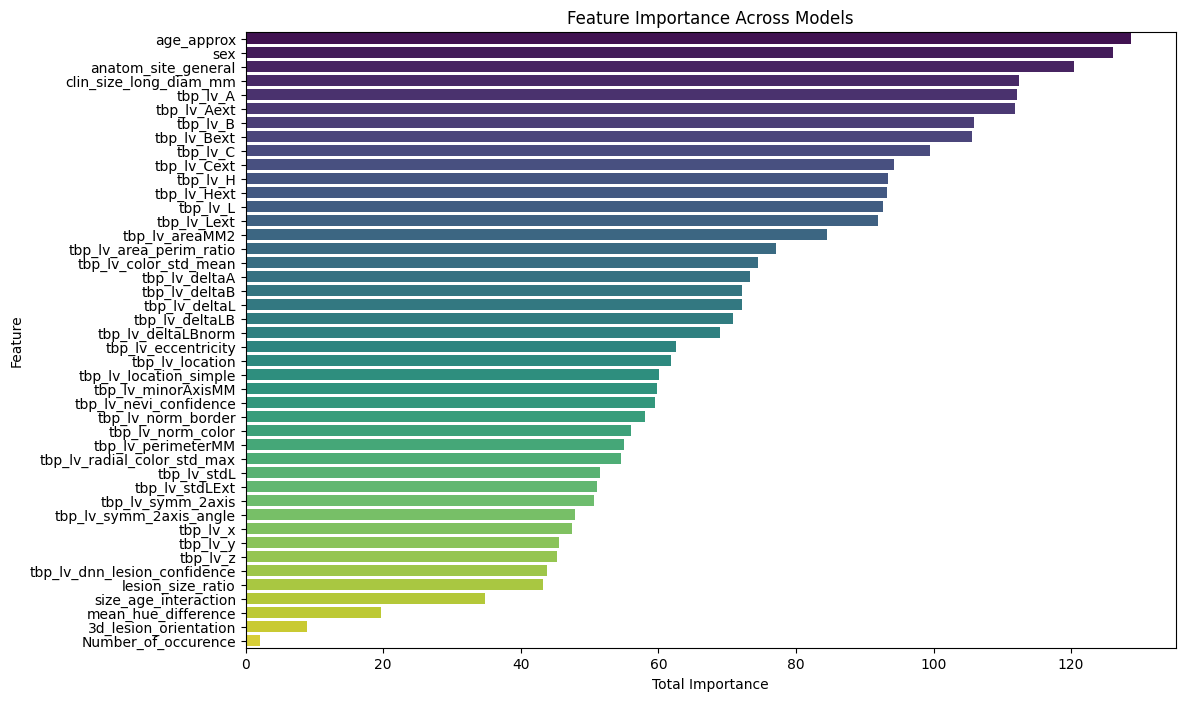

Top 20 features selected across models:                     Feature  Total_Importance
10               age_approx        128.760935
32                      sex        126.020870
36      anatom_site_general        120.469974
17   clin_size_long_diam_mm        112.436320
18                 tbp_lv_A        112.112086
3               tbp_lv_Aext        111.781357
26                 tbp_lv_B        105.955475
38              tbp_lv_Bext        105.624016
37                 tbp_lv_C         99.506395
21              tbp_lv_Cext         94.266044
43                 tbp_lv_H         93.453483
22              tbp_lv_Hext         93.173949
33                 tbp_lv_L         92.641554
25              tbp_lv_Lext         91.869195
40           tbp_lv_areaMM2         84.447831
5   tbp_lv_area_perim_ratio         77.122600
0     tbp_lv_color_std_mean         74.513544
13            tbp_lv_deltaA         73.290934
15            tbp_lv_deltaB         72.185860
12            tbp_lv_deltaL         72.1

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

def feature_selection_across_models(df, target_column, top_n=20):

      models = {
            'LightGBM': LGBMClassifier(),
            'CatBoost': CatBoostClassifier(verbose=0),  # Verbose=0 suppresses the training log
            'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
      }

      X = df.drop(columns=[target_column, 'isic_id'])  # Drop 'isic_id' from features
      y = df[target_column]

      importance_df = pd.DataFrame()

      for model_name, model in models.items():
            model.fit(X, y)
            importances = model.feature_importances_
            importance_df[model_name] = importances

      importance_df = importance_df.apply(pd.to_numeric, errors='coerce')

      importance_df['Total_Importance'] = importance_df.sum(axis=1, skipna=True)

      importance_df = importance_df.sort_values(by='Total_Importance', ascending=False)

      importance_df['Feature'] = X.columns

      top_features = importance_df[['Feature', 'Total_Importance']].head(top_n)

      plt.figure(figsize=(12, 8))
      sns.barplot(x='Total_Importance', y='Feature', data=importance_df, palette='viridis')
      plt.title('Feature Importance Across Models')
      plt.xlabel('Total Importance')
      plt.ylabel('Feature')
      plt.show()


      return top_features

top_features = feature_selection_across_models(final_df, target_column='target', top_n=20)
print("Top 20 features selected across models:", top_features)

In [89]:
feature_list = top_features['Feature'].tolist()
# feature_list.append(df['isic_id'])
print(feature_list)
dataset = final_df[feature_list]
dataset['isic_id'] = df['isic_id']
dataset['target'] = df['target']



['age_approx', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL']
0       0
1       0
2       0
3       0
4       0
       ..
8308    0
8309    0
8310    0
8311    0
8312    0
Name: target, Length: 8313, dtype: int64


In [90]:
dataset.to_csv('FE_csv.csv', index=False)

In [92]:
print(dataset['target'].value_counts())

target
0    7999
1     314
Name: count, dtype: int64


# TEST SET

In [93]:
df_test = pd.read_csv('dt/test.csv')

           isic_id  target  patient_id  age_approx     sex  \
0     ISIC_0083114       0  IP_6458452        40.0    male   
1     ISIC_0083212       0  IP_5180428        45.0  female   
2     ISIC_0084556       0  IP_4421863        70.0  female   
3     ISIC_0090351       0  IP_4849578        50.0  female   
4     ISIC_0090389       0  IP_1948385        45.0  female   
...            ...     ...         ...         ...     ...   
2074  ISIC_9980823       0  IP_1116526        80.0    male   
2075  ISIC_9983798       0  IP_7424727        50.0    male   
2076  ISIC_9985153       0  IP_1509264        60.0    male   
2077  ISIC_9990402       0  IP_7198665        60.0    male   
2078  ISIC_9993724       0  IP_7797815        75.0    male   

     anatom_site_general  clin_size_long_diam_mm          image_type  \
0         anterior torso                    2.50  TBP tile: close-up   
1        posterior torso                    2.88  TBP tile: close-up   
2        posterior torso               

In [94]:
test_reduced = drop(df_test,to_drop)

In [96]:
updated_reduced_test = fill_na_with_backward(test_reduced)

In [98]:
final_df_test = encode_categorical_features(updated_reduced_test)

In [100]:
feature_list = top_features['Feature'].tolist()
# feature_list.append(df['isic_id'])
print(feature_list)
dataset_test = final_df_test[feature_list]
dataset_test['isic_id'] = df['isic_id']
dataset_test['target'] = df['target']

['age_approx', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL']


In [101]:
print(dataset_test)

      age_approx  sex  anatom_site_general  clin_size_long_diam_mm   tbp_lv_A  \
0           40.0    1                    0                    2.50  21.229390   
1           45.0    0                    3                    2.88  31.373023   
2           70.0    0                    3                    5.81  24.537826   
3           50.0    0                    3                    7.08  20.206116   
4           45.0    0                    2                    2.93  15.453266   
...          ...  ...                  ...                     ...        ...   
2074        80.0    1                    3                    2.77  16.173527   
2075        50.0    1                    4                    2.71  29.584430   
2076        60.0    1                    0                    4.86  17.878173   
2077        60.0    1                    3                    3.90  19.027080   
2078        75.0    1                    0                    4.16  20.959580   

      tbp_lv_Aext   tbp_lv_

In [102]:
dataset_test.to_csv('FE_test_csv.csv', index=False)